# Finding the sea ice border of the satellite data

In [1]:
import xarray as xr
import cartopy.crs as ccrs
import numpy as np
import os

import SI_border_functions as sib

import matplotlib.pyplot as plt
import matplotlib.path as mpath
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 600

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

import seaborn as sns
sns.set()
sns.set_style("whitegrid")

/tmp/ipykernel_11724/4045614078.py:15: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf')


In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
#to not print the same warning endless times while calculating centers and borders

In [3]:
years = range(1979,2022)

Import the gridded satellite data

In [4]:
SI_sat_fine = xr.open_dataset("../SI_sat_0.5_deg.nc")
SI_sat_coarse = xr.open_dataset("../SI_sat_1.5_deg_from_0.5_deg.nc")

## Calculate center and borders

In [5]:
thlong = 1 #take every available longitudinal direction from the center
conc_t = 0.15 #concentration threshold

Coarse grid with all available points, center at the North pole: 

In [6]:
filename_cen_bo_coarse_N = "centers_borders_1_5_sat_every.nc"
if os.path.exists(filename_cen_bo_coarse_N):
    print("open existing data")
    cen_bo_coarse_N= xr.open_dataset(filename_cen_bo_coarse_N)
    centers_coarse_N = cen_bo_coarse_N.center.data
    borders_coarse_N = cen_bo_coarse_N.border.data
else: 
    print('create the dataset')
    centers_coarse_N = np.zeros((len(years), 2))
    borders_coarse_N = np.zeros((len(years), 2, len(SI_sat_coarse.lon.data[::thlong])))
    for ii, year in enumerate(range(len(years))):
        clo, cla = sib.calc_centre_90(SI_sat_coarse ,year)
        centers_coarse_N[ii] = [clo,cla]
        limpoints = sib.get_border_sat(SI_sat_coarse,year,thlong,clo,cla, conc_threshold = conc_t , exGr=False)
        borders_coarse_N[ii] = limpoints.T

    cen_bo_coarse_N = xr.Dataset({"center": (("t","coord"),centers_coarse_N), 
                "border": (("t", "coord", "point"),borders_coarse_N)},
                coords = {"t":np.arange(len(years)),
                        "coord": ["lat", "lon"],
                        "point": np.arange(len(SI_sat_coarse.lon.data[::thlong]))})

    cen_bo_coarse_N.to_netcdf(filename_cen_bo_coarse_N) 

open existing data


Coarse grid with all available points, moving center: 

In [7]:
filename_cen_bo_coarse_moving = "centers_borders_1_5_sat_every_moving.nc"

if os.path.exists(filename_cen_bo_coarse_moving):
    print("open existing data")
    cen_bo_coarse_moving= xr.open_dataset(filename_cen_bo_coarse_moving)
    centers_coarse_moving = cen_bo_coarse_moving.center.data
    borders_coarse_moving = cen_bo_coarse_moving.border.data
else: 
    print('create the dataset')
    centers_coarse_moving = np.zeros((len(years), 2))
    borders_coarse_moving = np.zeros((len(years), 2, len(SI_sat_coarse.lon.data[::thlong])))
    for ii, year in enumerate(range(len(years))):
        clo,cla = sib.calc_centre_sat(SI_sat_coarse ,year)
        centers_coarse_moving[ii] = [clo,cla]
        limpoints = sib.get_border_sat(SI_sat_coarse,year,thlong,clo,cla, conc_threshold = conc_t , exGr=False)
        borders_coarse_moving[ii] = limpoints.T

    cen_bo_coarse_moving = xr.Dataset({"center": (("t","coord"),centers_coarse_moving), 
                "border": (("t", "coord", "point"),borders_coarse_moving)},
                coords = {"t":np.arange(len(years)),
                        "coord": ["lat", "lon"],
                        "point": np.arange(len(SI_sat_coarse.lon.data[::thlong]))})

    cen_bo_coarse_moving.to_netcdf(filename_cen_bo_coarse_moving) 

create the dataset


Fine grid with all available points, center at the North pole: 

In [9]:
filename_cen_bo_fine_N = "centers_borders_0_5_sat_every_centerN.nc"
if os.path.exists(filename_cen_bo_fine_N):
    print("open existing data")
    cen_bo_fine_N= xr.open_dataset(filename_cen_bo_fine_N)
    centers_fine_N = cen_bo_fine_N.center.data
    borders_fine_N = cen_bo_fine_N.border.data
else: 
    print('create the dataset')
    centers_fine_N = np.zeros((len(years), 2))
    borders_fine_N = np.zeros((len(years), 2, len(SI_sat_fine.lon.data[::thlong])))
    for ii, year in enumerate(range(len(years))):
        clo,cla = sib.calc_centre_90(SI_sat_fine ,year)
        centers_fine_N[ii] = [clo,cla]
        limpoints = sib.get_border_sat(SI_sat_fine,year,thlong,clo,cla, conc_threshold = conc_t , exGr=False)
        borders_fine_N[ii] = limpoints.T

    cen_bo_fine_N = xr.Dataset({"center": (("t","coord"),centers_fine_N), 
                "border": (("t", "coord", "point"),borders_fine_N)},
                coords = {"t":np.arange(len(years)),
                        "coord": ["lat", "lon"],
                        "point": np.arange(len(SI_sat_fine.lon.data[::thlong]))})
    
    cen_bo_fine_N.to_netcdf(filename_cen_bo_fine_N) 

open existing data


Fine grid with all available points, moving center: 

In [11]:
filename_cen_bo_fine_moving = "centers_borders_0_5_sat_every_moving_center.nc"
if os.path.exists(filename_cen_bo_fine_moving):
    print("open existing data")
    cen_bo_fine_moving= xr.open_dataset(filename_cen_bo_fine_moving)
    centers_fine_moving = cen_bo_fine_moving.center.data
    borders_fine_moving = cen_bo_fine_moving.border.data
else: 
    print('create the dataset')
    centers_fine_moving = np.zeros((len(years), 2))
    borders_fine_moving = np.zeros((len(years), 2, len(SI_sat_fine.lon.data[::thlong])))
    for ii, year in enumerate(range(len(years))):
        clo,cla = sib.calc_centre_sat(SI_sat_fine ,year)
        centers_fine_moving[ii] = [clo,cla]
        limpoints = sib.get_border_sat(SI_sat_fine,year,thlong,clo,cla, conc_threshold = conc_t , exGr=False)
        borders_fine_moving[ii] = limpoints.T

    cen_bo_fine_moving = xr.Dataset({"center": (("t","coord"),centers_fine_moving), 
                "border": (("t", "coord", "point"),borders_fine_moving)},
                coords = {"t":np.arange(len(years)),
                        "coord": ["lat", "lon"],
                        "point": np.arange(len(SI_sat_fine.lon.data[::thlong]))})
    
    cen_bo_fine_moving.to_netcdf(filename_cen_bo_fine_moving) 

create the dataset


Look at the results:

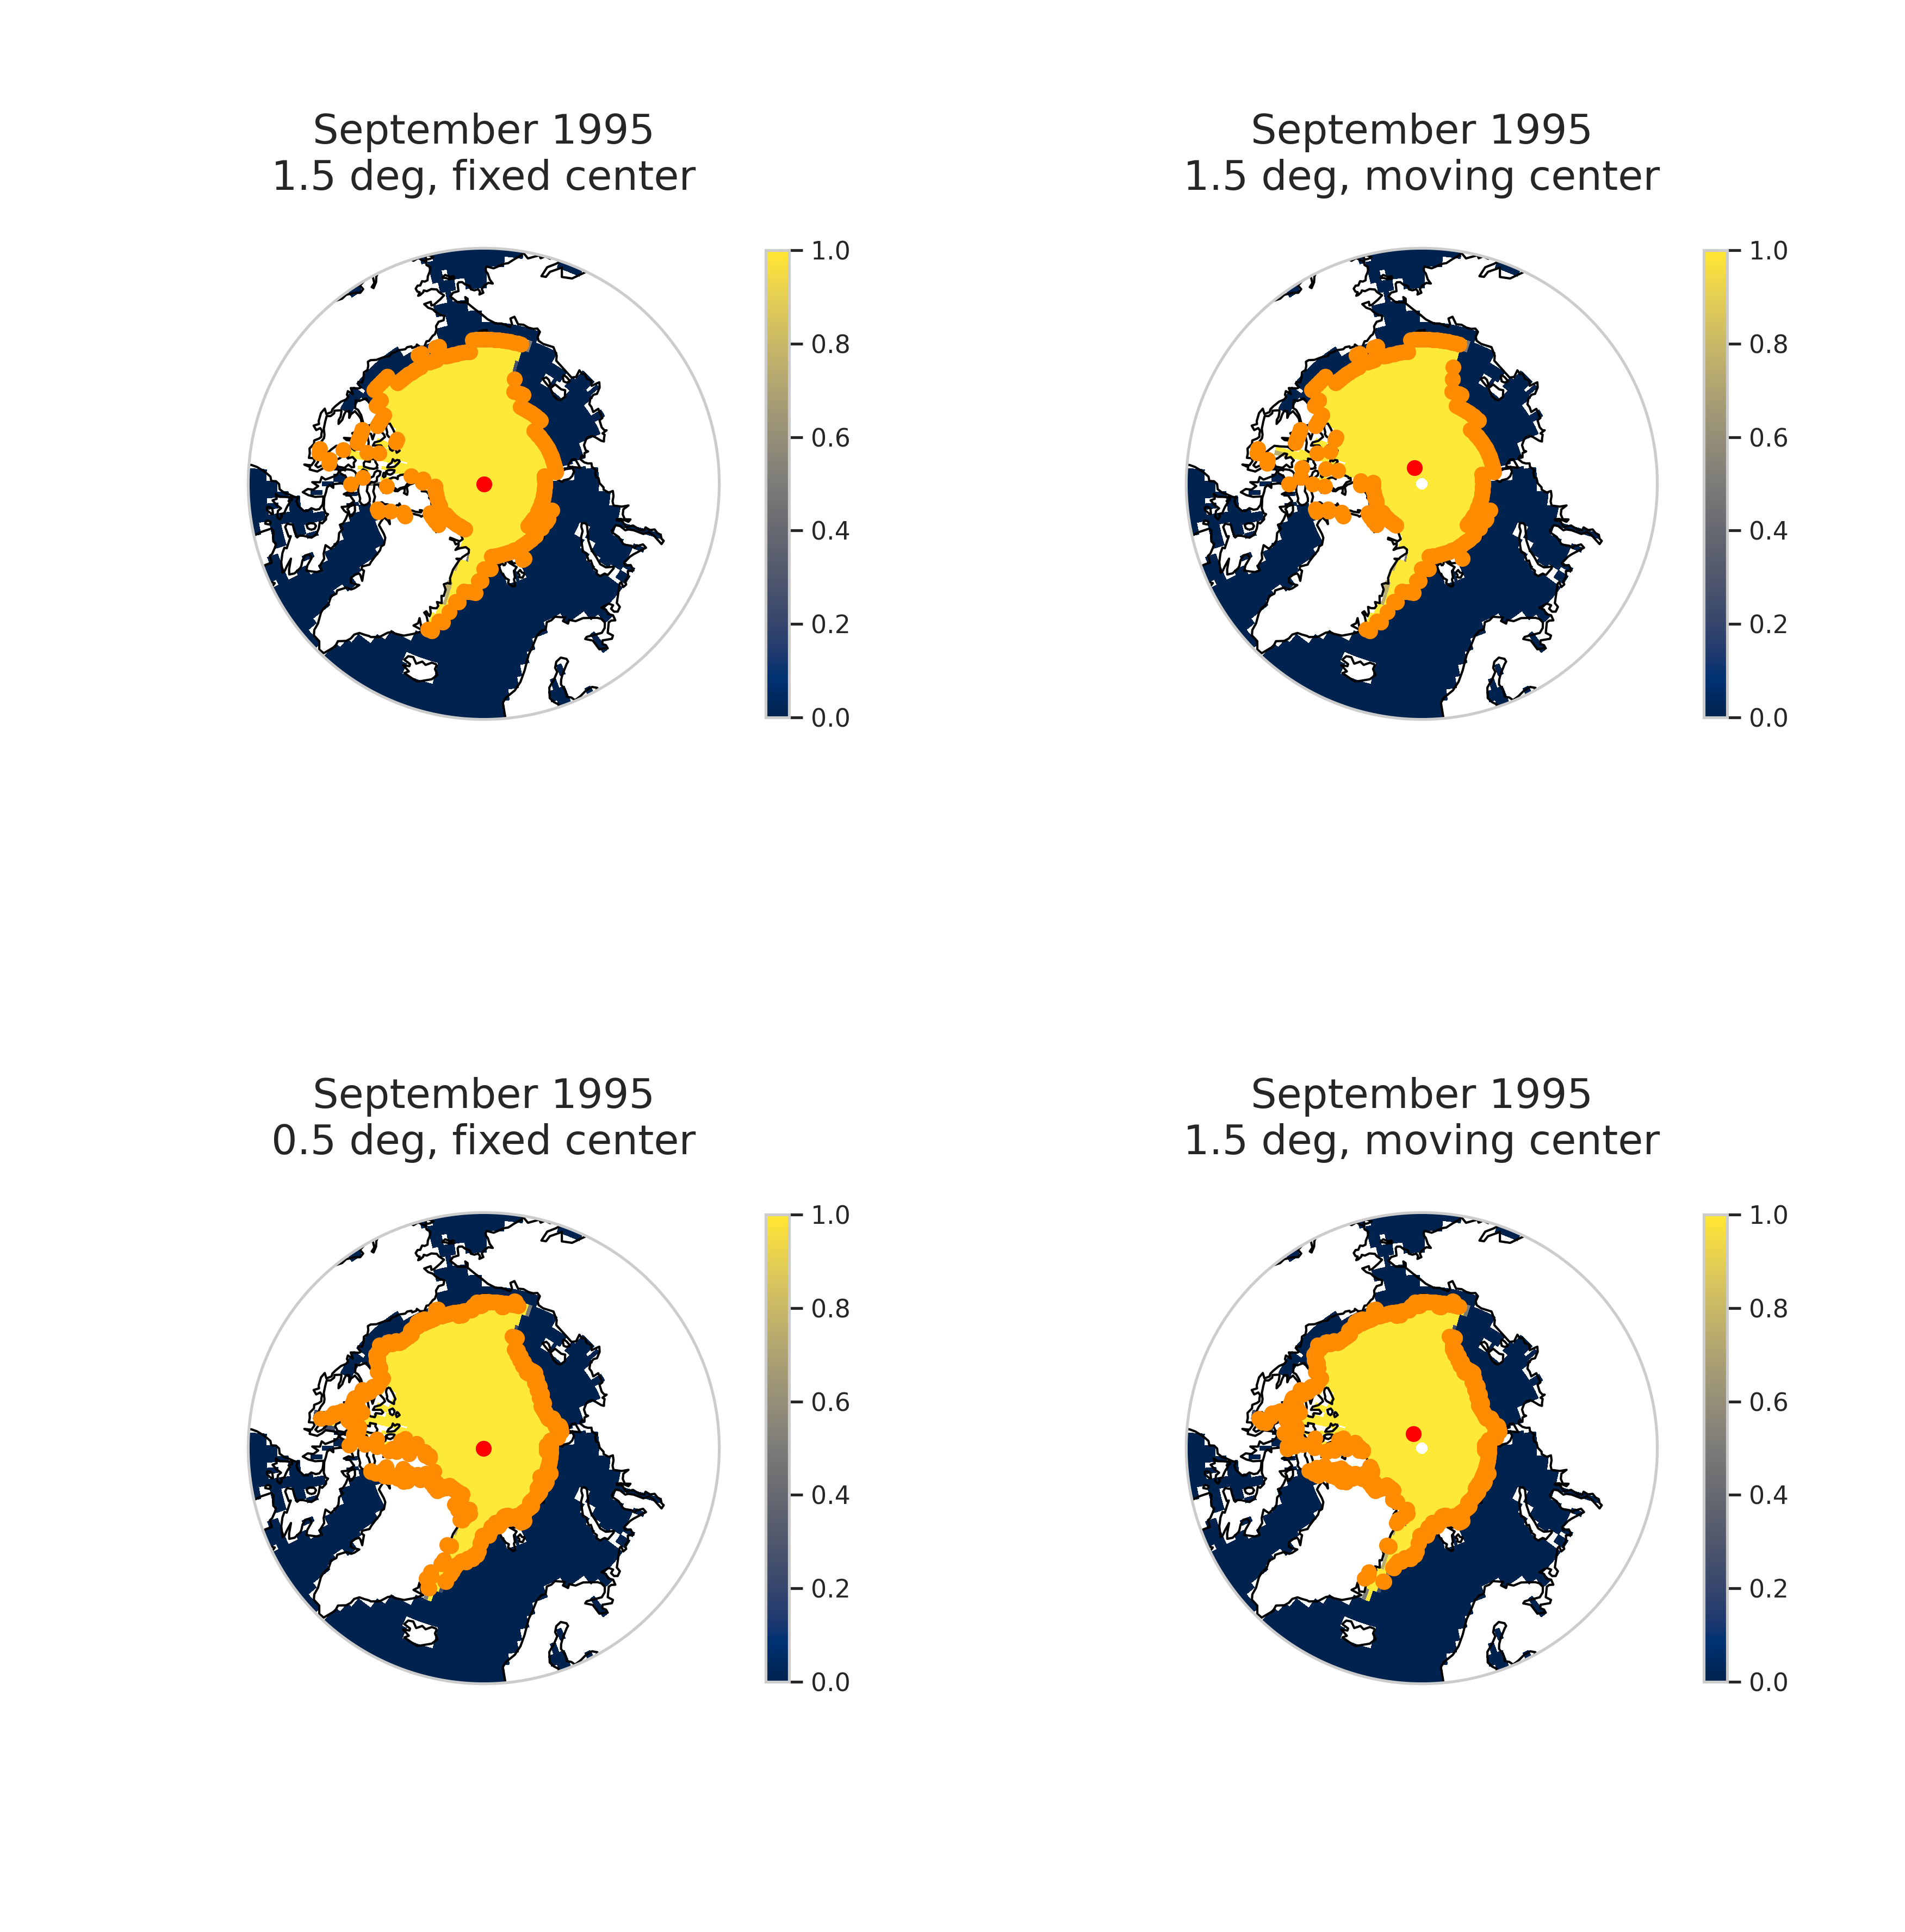

In [19]:
fig = plt.figure(figsize=[12,12])

r_limit = 3214068.5

year=16

for i,borders in enumerate([borders_coarse_N, borders_coarse_moving, borders_fine_N, borders_fine_moving]):
    centers = [centers_coarse_N, centers_coarse_moving, centers_fine_N, centers_fine_moving][i]
    name = ["1.5 deg, fixed center", "1.5 deg, moving center", "0.5 deg, fixed center", "1.5 deg, moving center"][i]
    
    ax=fig.add_subplot(2, 2, i+1, projection=ccrs.Orthographic(0, 90))
    im = SI_sat_coarse.siconc.isel(time=year).plot(ax=ax,transform=ccrs.PlateCarree(), cmap='cividis')#'cividis'"
    #plot borderpoints
    ax.plot(borders[year,0,::1],borders[year,1,::1],color="darkorange", linewidth=0,marker="o", transform = ccrs.Geodetic()) 
    #plot centerpoint
    ax.plot(centers[year,0],centers[year,1],color="red",linewidth=0,marker='o',transform=ccrs.Geodetic(),label = "center") 
    ax.coastlines()

    circle_path = mpath.Path.unit_circle()
    circle_path = mpath.Path(circle_path.vertices.copy() * r_limit,
                            circle_path.codes.copy())
    ax.set_boundary(circle_path)

    ax.set_title("September "+ str(years[year]) + "\n" + name, y=0.8, fontsize=18)

    im.colorbar.remove()
    plt.colorbar(im,shrink=0.5, pad=-0.2)
plt.tight_layout()
